# MNIST - Categorical Classification
> # Overfitting
## Import Tensorflow & Keras

* TensorFlow Version 지정

In [2]:
%tensorflow_version 1.x
import tensorflow as tf
tf.__version__

'1.15.0'

* GPU 설정 확인

In [3]:
tf.test.gpu_device_name()

'/device:GPU:0'

* Keras Version 확인

In [4]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.5'

# I. MNIST Data_Set Load & Review

> ## 1) Load MNIST Data_Set

In [5]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


* Train_Data Information

In [6]:
print(train_images.shape)
print(len(train_labels))
print(train_labels[0:5])

(60000, 28, 28)
60000
[5 0 4 1 9]


* Test_Data Information

In [7]:
print(test_images.shape)
print(len(test_labels))
print(test_labels[0:5])

(10000, 28, 28)
10000
[7 2 1 0 4]


> ## 2) Visualization

In [0]:
print(train_images[4])

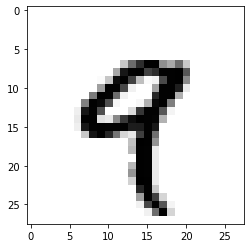

In [8]:
import matplotlib.pyplot as plt

digit = train_images[4]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

# II. Data Preprocessing

> ## 1) Reshape and Normalization

* reshape

In [13]:
# 2차원을 1차원으로 바꿔준다. DNN에서는 1차원만 가능하다.
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images.shape, test_images.shape

((60000, 784), (10000, 784))

* Normalization

In [0]:
train_images = train_images.astype(float) / 255
test_images = test_images.astype(float) / 255
# 나눠주는 것이다. 이미지의 노말라이제이션이 된다.

In [12]:
print(train_images[4])

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

> ## 2) One Hot Encoding

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [15]:
print(train_labels[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


# III. MNIST Keras Modeling

> ## 1) Model Define

* 모델 신경망 구조 정의
 - 2개의 Hidden Layers & 768개의 Nodes
 - 복잡한 Model Capacity로 인한 Overfitting

In [16]:
from keras import models
from keras import layers

mnist = models.Sequential()
mnist.add(layers.Dense(512, activation = 'relu', input_shape=(28 * 28,)))
mnist.add(layers.Dense(256, activation = 'relu'))
mnist.add(layers.Dense(10, activation = 'softmax')) # 정의해주는 것이다.

* 모델 구조 확인

In [17]:
mnist.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


* 모델 세션 초기화 및 삭제

In [0]:
# from keras import backend as K 
# K.clear_session()
# del mnist

> ## 2) Model Compile

* 모델 학습방법 설정

In [0]:
mnist.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

> ## 3) Model Fit

* 모델 학습 수행

In [20]:
Hist_mnist = mnist.fit(train_images, train_labels,
                       epochs = 50,
                       batch_size = 128,
                       validation_split = 0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 48000 samples, validate on 12000 samples
Epoch 1/50





48000/48000 [==============================] - 9s 192us/step - loss: 1.0287 - acc: 0.6933 - val_loss: 0.4816 - val_acc: 0.8627
Epoch 2/50
48000/48000 [==============================] - 1s 28us/step - loss: 0.4281 - acc: 0.8753 - val_loss: 0.3518 - val_acc: 0.8977
Epoch 3/50
48000/48000 [==============================] - 1s 29us/step - loss: 0.3405 - acc: 0.9003 - val_loss: 0.3058 - val_acc: 0.9088
Epoch 4/50
48000/48000 [==============================] - 1s 27us/step - loss: 0.2947 - acc: 0.9135 - val_loss: 0.2660 - val_acc: 0.9251
Epoch 5/50
48000/48000 [==============================] - 1s 28us/step - loss: 0.2604 - acc: 0.9227 - val_loss: 0.2327 - val_acc: 0.9324
Epoch 6/50
48000/48000 [==============================] - 1s 27us/step - loss: 0.2295 - acc: 0.9321 - val_loss: 0.1989 - val_acc: 0.9435
Epoch 7/50
48000/48000 [=

> ## 4) 학습 결과 시각화 - Overfitting

* Loss Visualization

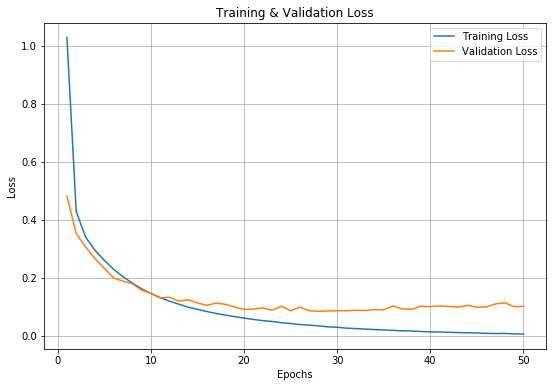

In [21]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

> ## 5) Model Evaluate

* Loss & Accuracy

In [22]:
loss, accuracy = mnist.evaluate(test_images, test_labels)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

10000/10000 [==============================] - 0s 36us/step
Loss = 0.08368
Accuracy = 0.98150


> ## 6) Model Predict

* Probability

In [0]:
print(mnist.predict(test_images[:1,:]))

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 2.4618628e-35]]


* Class

In [0]:
print(mnist.predict_classes(test_images[:1,:]))

[7]


# 
# 
# 
# The End
# 
# 
# 